In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
df = pd.read_csv('Done.csv')
df


[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Shahrour\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Fatalities,Ground,Summary
0,1,17-Sep-1908,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fl..."
1,2,07-Sep-1909,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever b...
2,3,12-Jul-1912,6:30 AM,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offs...
3,4,06-Aug-1913,NaN,"Victoria, British Columbia, Canada",Private,Victoria,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada o...
4,5,09-Sep-1913,6:30 PM,Over the North Sea,Military - German Navy,"Berlin,Johannisthal",Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and enco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,5010,10-Jun-2021,8:00 AM,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14 (passengers:12 crew:2),12 (passengers:11 crew:1),0,The plane was carrying military personnel and...
5010,5011,04-Jul-2021,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96 (passengers:88 crew:8),50 (passengers:? crew:?),3,"While attempting to land at Jolo Airport, the..."
5011,5012,06-Jul-2021,3:00 PM,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28 (passengers:22 crew:6),28 (passengers:22 crew:6),0,The passenger plane crashed into the top of a...
5012,5013,12-Sep-2021,11:15 PM,"Kazachinskoye , Russia",Aeroservice/SiLA,Irkutsk - Kazachinskoye,Let L-410UVP-E20,RA-67042,2916,16 (passengers:14 crew:2),4 (passengers:3 crew:1),0,The aircraft was on it's second approach in h...


In [20]:
df

,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Fatalities,Ground,Summary
0,1,17-Sep-1908,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fl..."
1,2,07-Sep-1909,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever b...
2,3,12-Jul-1912,6:30 AM,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offs...
3,4,06-Aug-1913,NaN,"Victoria, British Columbia, Canada",Private,Victoria,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,The first fatal airplane accident in Canada o...
4,5,09-Sep-1913,6:30 PM,Over the North Sea,Military - German Navy,"Berlin,Johannisthal",Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0,The airship flew into a thunderstorm and enco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,5010,10-Jun-2021,8:00 AM,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14 (passengers:12 crew:2),12 (passengers:11 crew:1),0,The plane was carrying military personnel and...
5010,5011,04-Jul-2021,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96 (passengers:88 crew:8),50 (passengers:? crew:?),3,"While attempting to land at Jolo Airport, the..."
5011,5012,06-Jul-2021,3:00 PM,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28 (passengers:22 crew:6),28 (passengers:22 crew:6),0,The passenger plane crashed into the top of a...
5012,5013,12-Sep-2021,11:15 PM,"Kazachinskoye , Russia",Aeroservice/SiLA,Irkutsk - Kazachinskoye,Let L-410UVP-E20,RA-67042,2916,16 (passengers:14 crew:2),4 (passengers:3 crew:1),0,The aircraft was on it's second approach in h...


In [21]:
Data = df.copy()
Data['isMilitary'] = Data.Operator.str.contains('Military')
Data = Data.groupby('isMilitary')[['isMilitary']].count()
Data.index = ['Passenger', 'Military']

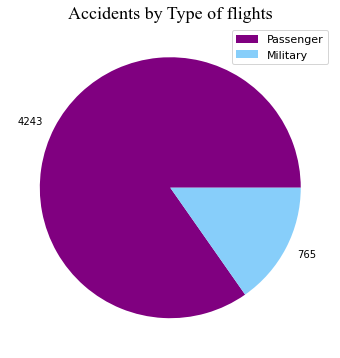

In [35]:
colors = ['purple', 'lightskyblue']
plt.figure(figsize=(15,6))
patches, texts = plt.pie(Data.isMilitary, colors=colors, labels=Data.isMilitary)
plt.legend(patches, Data.index, loc="best", fontsize=11)
plt.title('Accidents by Type of flights', fontsize=18, fontname='Times New Roman')
plt.show()

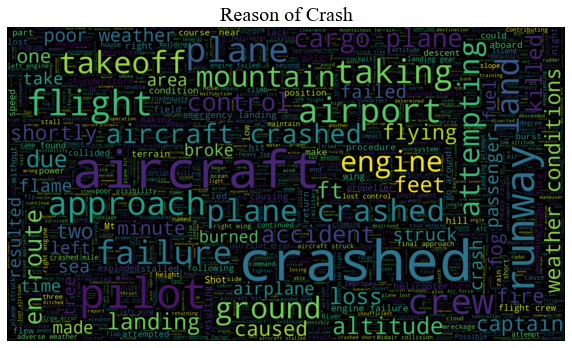

In [31]:
# PIL is used to import images from the users own PC
from PIL import Image 
#stopwords is to remove words that dont add meaning to sentences such as or and in to name a few
stopwords = nltk.corpus.stopwords.words('english')
text = str(df.Summary.tolist())
globe_mask = np.array(Image.open('transparent.png'))

# designing the worldcloud,  
wc = WordCloud(max_words=2000,mask=globe_mask,stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
# removes the axis such as the numbers on left and right side
plt.axis("off")
plt.title('Reason of Crash',fontname = 'Times New Roman',fontsize=20)
plt.show()